In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm
import cv2
import os

Filename: Leo_DESI_griz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   (3000, 3000, 4)   float32   
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                 3000 / length of data axis 1                          NAXIS2  =                 3000 / length of data axis 2                          NAXIS3  =                    4 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H SURVEY  = 'LegacySurvey'                                                        VERSION = 'DR10    '                  

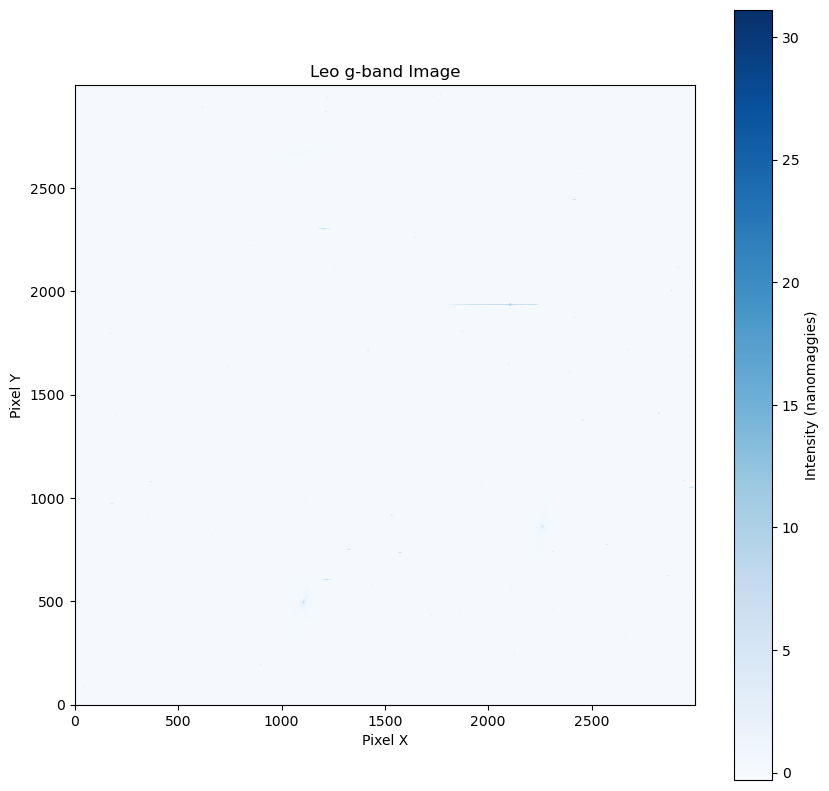

maximum value in g-band flux: 31.120201
minimum value in g-band flux: -0.29791212
maximum value in i-band flux: 25.492533
minimum value in i-band flux: -0.31766394
maximum value in g-band flux: (np.int64(1636), np.int64(737))
maximum value in i-band flux: (np.int64(2253), np.int64(230))


In [2]:
# Load the FITS file (update the filename as needed)
filename = "Leo_DESI_griz.fits"
object_name = filename.split('_')[0]
hdul = fits.open(filename)

# Display the structure of the FITS file
hdul.info()

# Assuming the image data is in the primary HDU (index 0)
data = hdul[0].data

# Optionally, print header information to see details about the observation
header = hdul[0].header
print(header)

# Close the FITS file after loading data (optional but recommended)
hdul.close()
 
g_band_flux = data[0]  
r_band_flux = data[1]
i_band_flux = data[2]
z_band_flux = data[3]

# Plot the data using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(g_band_flux, cmap='Blues', origin='lower')
plt.colorbar(label='Intensity (nanomaggies)')
plt.title(f"{object_name} g-band Image")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

# Check satruration
print("maximum value in g-band flux:", np.max(g_band_flux))
print("minimum value in g-band flux:", np.min(g_band_flux))
print("maximum value in i-band flux:", np.max(i_band_flux))
print("minimum value in i-band flux:", np.min(i_band_flux))
# localize the maxinum value
print("maximum value in g-band flux:", np.unravel_index(np.argmax(g_band_flux), g_band_flux.shape))
print("maximum value in i-band flux:", np.unravel_index(np.argmax(i_band_flux), i_band_flux.shape))

In [3]:
plt.figure(figsize=(10, 10))
plt.style.use('dark_background')  # Set black background
# use only positive values for log scaling
im = plt.imshow(r_band_flux, cmap='magma', origin='lower',
                norm=LogNorm(vmin=1e-3, vmax=5))

# plt.title(f"{object_name} g-band Image")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.axis('off')  # Remove axes for cleaner look
plt.tight_layout()
# plt.savefig(f"{object_name}_g_band.png", dpi=400, bbox_inches='tight')
plt.show()

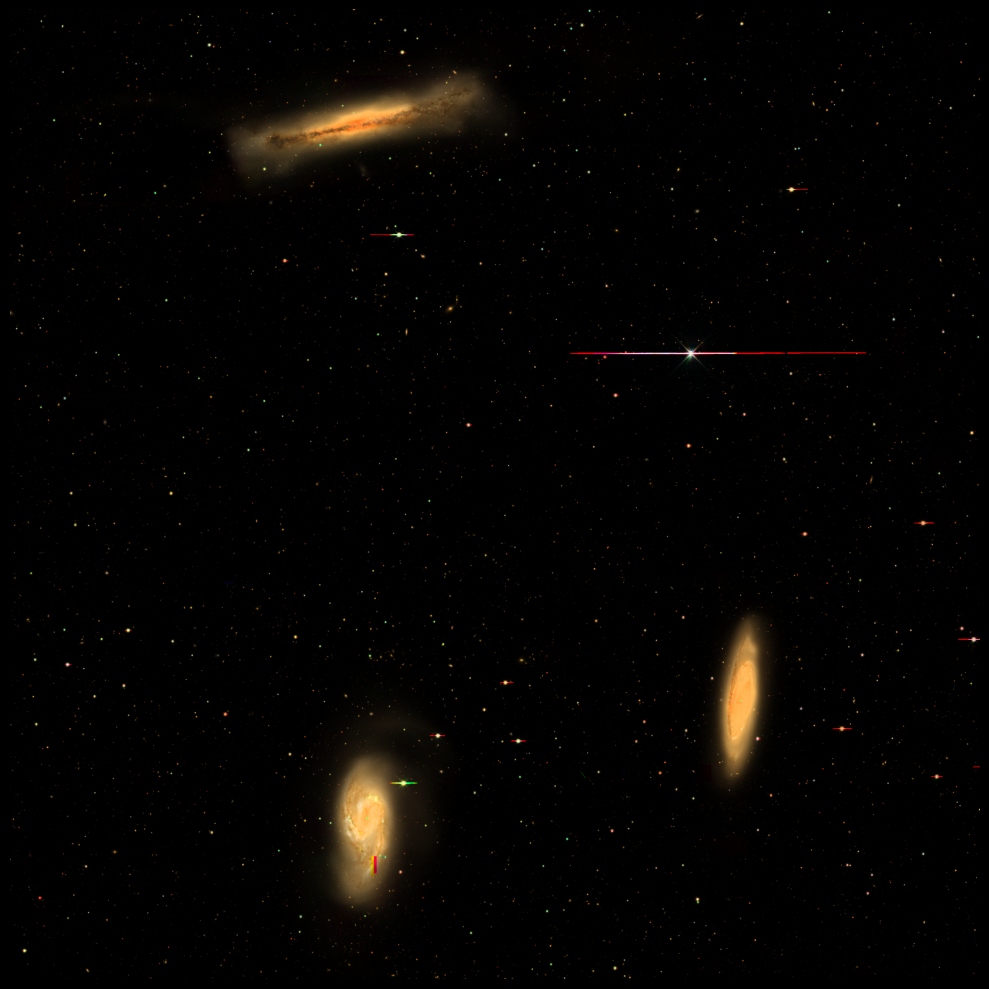

In [ ]:
from astropy.visualization import make_lupton_rgb

# Map i→R, r→G, g→B.  Tweak stretch and Q to taste:
rgb = make_lupton_rgb(i_band_flux, 
                      r_band_flux, 
                      g_band_flux, 
                      stretch=0.25,  # overall contrast
                      Q=4)        # how aggressively to clip highlights

plt.figure(figsize=(10,10))
plt.imshow(rgb, origin='lower')
plt.axis('off')
plt.tight_layout()
plt.savefig(f"{object_name}.png", dpi=600, bbox_inches='tight')
plt.show()